## Regression

This notebook is a part of a course given by Janani Ravi at Pluralsight. The course name is "Designing a Machine Learning Model". 

The data can be found here: https://www.kaggle.com/sazid28/advertising.csv

In [1]:
import sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
print(sklearn.__version__)

0.22.2.post1


#### Data

In [3]:
advertising_data = pd.read_csv("../dataset/Advertising.csv", index_col=0)
advertising_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Analysis

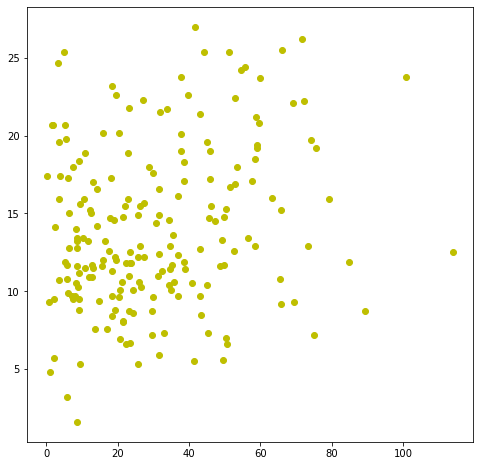

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data["newspaper"], advertising_data["sales"], c="y")
plt.show()

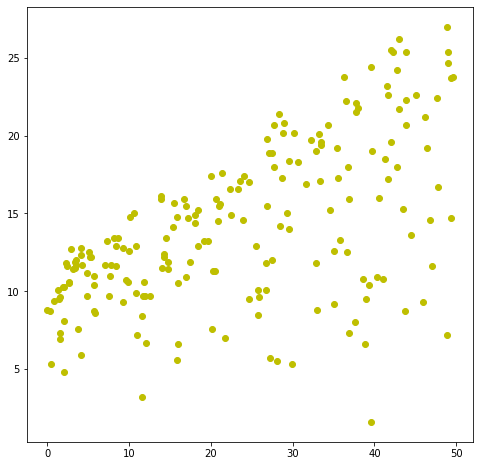

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data["radio"], advertising_data["sales"], c="y")
plt.show()

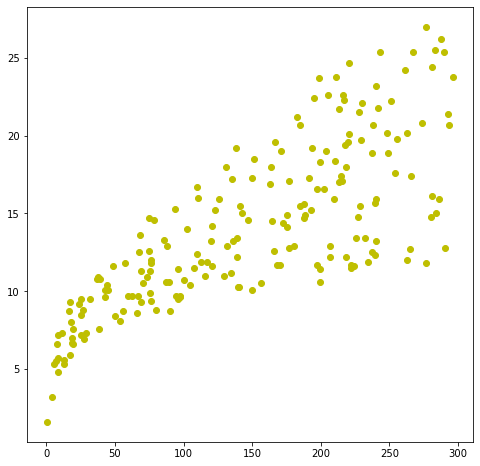

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data["TV"], advertising_data["sales"], c="y")
plt.show()

In [8]:
advertising_data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


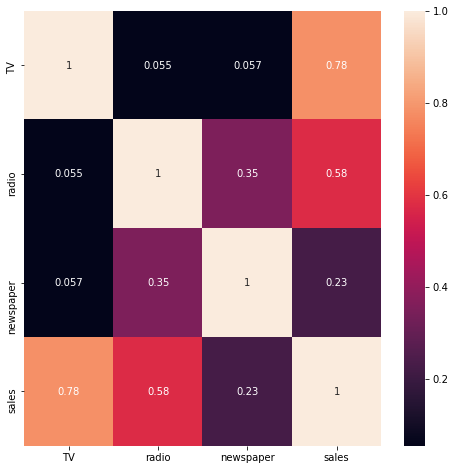

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(advertising_data.corr(), annot=True)

### Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X = advertising_data["TV"].values.reshape(-1, 1)
Y = advertising_data["sales"].values.reshape(-1, 1)

X.shape, Y.shape

((200, 1), (200, 1))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)

stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           4.76e-26
Time:                        19:09:32   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

In [14]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)

In [15]:
print("training:", linear_reg.score(x_train, y_train))

training: 0.5552336104251212


In [16]:
y_pred = linear_reg.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
print("R squared score", r2_score(y_test, y_pred))

R squared score 0.725606346597073


In [18]:
def adjusted_r2_score(r_square, labels, features):
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1])
    
    return adj_r_square

In [19]:
print("Adjusted r2 score", adjusted_r2_score(r2_score(y_test, y_pred), y_test, x_test))

Adjusted r2 score 0.725606346597073


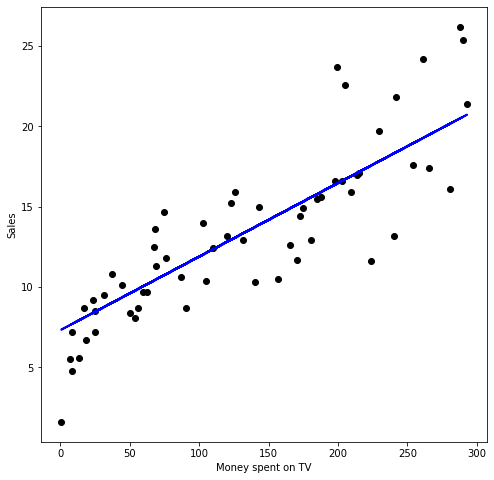

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(x_test, y_test, c="black")
plt.plot(x_test, y_pred, c="blue", linewidth=2)
plt.xlabel("Money spent on TV")
plt.ylabel("Sales")
plt.show()

### Multile regression

In [21]:
X = advertising_data.drop("sales", axis=1)
Y = advertising_data["sales"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [25]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()
print(fit_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.94e-70
Time:                        19:10:00   Log-Likelihood:                -257.57
No. Observations:                 140   AIC:                             523.1
Df Residuals:                     136   BIC:                             534.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1486      0.348      9.056      0.0

In [27]:
linear_reg = LinearRegression(normalize=True).fit(x_train, y_train)
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
print("Training Score:", linear_reg.score(x_train, y_train))

Training Score: 0.908623536767468


#### With prediction

In [32]:
y_pred = linear_reg.predict(x_test)
print("Testing Score:", r2_score(y_test, y_pred))

Testing Score: 0.8727188927949014
